## Birds Classifier

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import os
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

In [121]:
N_SPECIES = 20

### Load Training Set

In [122]:
train_path = 'data/200_species_train'

In [123]:
def load_dataset(data_path, max_species=100, shuffled=True, grayscale=False, flatten=False): 
    data_images = []
    data_labels = []
    for num_species, specie in enumerate(os.listdir(data_path)):
        images_path = os.path.join(data_path,specie)
        for i in os.listdir(images_path):
            image_path = os.path.join(images_path,i)
            im = Image.open(image_path)
            if grayscale:
                im = im.convert("L")
            arr = np.asarray(im)
            if flatten:
                arr = arr.flatten()
            data_images.append(arr)
            data_labels.append(specie)
        if num_species == max_species-1:
            break
    data_images = np.array(data_images)
    data_labels = np.array(data_labels)
    
    if shuffled:
        X, y = shuffle(data_images, data_labels, random_state=42)
    return X, y

We need to shuffle so we won't have the species in order

In [124]:
X_train, y_train = load_dataset(train_path, max_species=N_SPECIES)

In [125]:
X_train.shape

(2840, 224, 224, 3)

In [126]:
y_train[:10]

array(['COCK OF THE  ROCK', 'BALD EAGLE', 'SPOONBILL', 'SPOONBILL',
       'CAPE MAY WARBLER', 'COCK OF THE  ROCK', 'HOUSE SPARROW',
       'NORTHERN MOCKINGBIRD', 'QUETZAL', 'RED FACED WARBLER'],
      dtype='<U23')

In [127]:
y_train.size

2840

In [128]:
X_train[:3]

array([[[[ 57,  77,  24],
         [ 57,  77,  24],
         [ 57,  77,  24],
         ...,
         [ 68,  79,  19],
         [ 67,  78,  18],
         [ 68,  78,  18]],

        [[ 57,  77,  26],
         [ 57,  77,  26],
         [ 57,  77,  26],
         ...,
         [ 68,  79,  19],
         [ 67,  78,  18],
         [ 68,  78,  18]],

        [[ 58,  78,  27],
         [ 58,  78,  27],
         [ 58,  78,  27],
         ...,
         [ 68,  79,  19],
         [ 68,  78,  18],
         [ 67,  77,  17]],

        ...,

        [[ 59,  80,  47],
         [ 59,  80,  47],
         [ 60,  82,  46],
         ...,
         [ 63,  78,  37],
         [ 65,  80,  39],
         [ 69,  81,  41]],

        [[ 60,  81,  48],
         [ 60,  82,  46],
         [ 60,  82,  46],
         ...,
         [ 61,  76,  35],
         [ 62,  77,  34],
         [ 67,  80,  37]],

        [[ 60,  81,  48],
         [ 60,  82,  46],
         [ 61,  83,  47],
         ...,
         [ 62,  77,  34],
        

### Loading Validation Set

Each Image is transformed to Grayscale

In [129]:
validation_path = 'data/200_species_valid/'

In [130]:
X_val, y_val = load_dataset(validation_path, max_species=N_SPECIES)

In [131]:
X_val.shape

(100, 224, 224, 3)

In [132]:
X_val[:3]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [224, 251, 122],
         [229, 253, 143],
         [229, 251, 153]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [224, 251, 108],
         [229, 255, 132],
         [233, 255, 148]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [214, 244,  84],
         [223, 250, 111],
         [232, 255, 134]],

        ...,

        [[122, 125,  22],
         [135, 138,  33],
         [148, 151,  44],
         ...,
         [237, 238, 232],
         [240, 241, 236],
         [243, 245, 240]],

        [[157, 158,  54],
         [170, 172,  65],
         [180, 182,  75],
         ...,
         [237, 234, 229],
         [240, 237, 232],
         [245, 242, 237]],

        [[189, 187,  86],
         [198, 196,  93],
         [203, 202,  96],
         ...,
         [236, 231, 227],
        

In [133]:
y_val.size

100

In [134]:
y_val[:10]

array(['BIRD OF PARADISE', 'ANNAS HUMMINGBIRD', 'RED FACED WARBLER',
       'WHITE CHEEKED TURACO', 'CAPE MAY WARBLER', 'SPOONBILL',
       'STORK BILLED KINGFISHER', 'BIRD OF PARADISE', 'COCK OF THE  ROCK',
       'NORTHERN CARDINAL'], dtype='<U23')

In [135]:
rows_train = X_train.shape[0]
rows_val = X_val.shape[0]

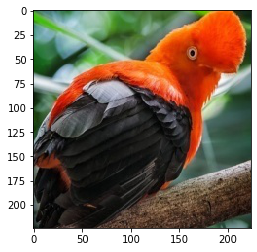

In [136]:
plt.imshow(X_train[5])
plt.show()

In [137]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)

In [138]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [139]:
y_train.shape

(2840, 20)

In [140]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [141]:
y_val.shape

(100, 20)

In [142]:
y_val[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

**Augmentation**

In [143]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [144]:
X_train.shape

(2840, 224, 224, 3)

In [145]:
train_datagen.fit(X_train)

In [146]:
X_train.shape

(2840, 224, 224, 3)

In [147]:
val_datagen.fit(X_val)

In [149]:
X_val.shape

(100, 224, 224, 3)

**Transfer learning using Resnet50 trained on Imagnet**

In [150]:
resnet = ResNet50(input_shape=X_train.shape[1:], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 12s 0us/step


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

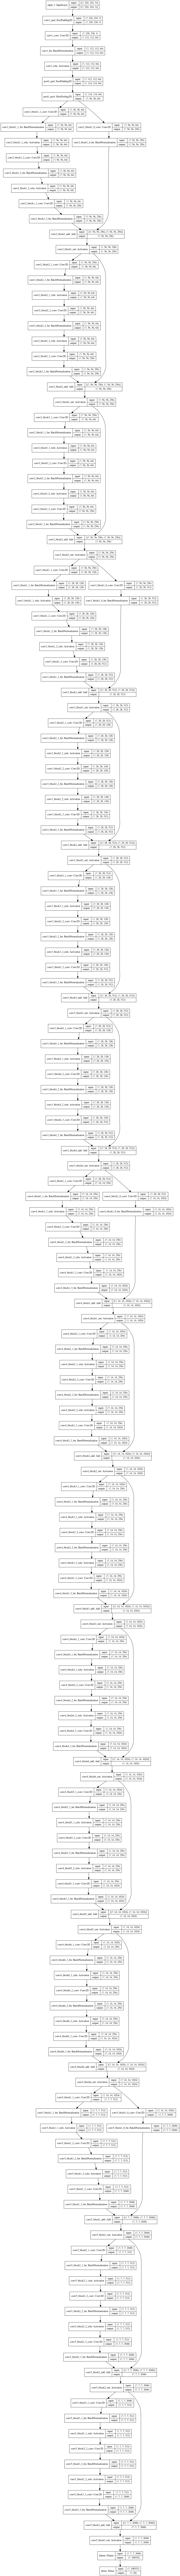

In [151]:
flat = Flatten()(resnet.output)
out = Dense(N_SPECIES, activation='softmax')(flat)
model = Model(inputs=resnet.input, outputs=out)
model.summary()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [152]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [154]:
history = model.fit(X_train, y_train, batch_size=32,
          validation_data=(X_val, y_val), epochs=5, verbose=1,use_multiprocessing=True)

Epoch 1/5
89/89 [==============================] - 110s 1s/step - loss: 4.4568 - accuracy: 0.7792 - val_loss: 1.3279 - val_accuracy: 0.9000
Epoch 2/5
89/89 [==============================] - 113s 1s/step - loss: 0.4935 - accuracy: 0.9662 - val_loss: 1.1098 - val_accuracy: 0.9300
Epoch 3/5
89/89 [==============================] - 116s 1s/step - loss: 0.3205 - accuracy: 0.9803 - val_loss: 1.8378 - val_accuracy: 0.9300
Epoch 4/5
89/89 [==============================] - 111s 1s/step - loss: 0.1938 - accuracy: 0.9863 - val_loss: 0.1005 - val_accuracy: 0.9800
Epoch 5/5
89/89 [==============================] - 110s 1s/step - loss: 0.1895 - accuracy: 0.9859 - val_loss: 0.6492 - val_accuracy: 0.9700


In [155]:
y_pred_val = model.predict(X_val)

In [163]:
y_val.argmax(axis=1).shape

(100,)

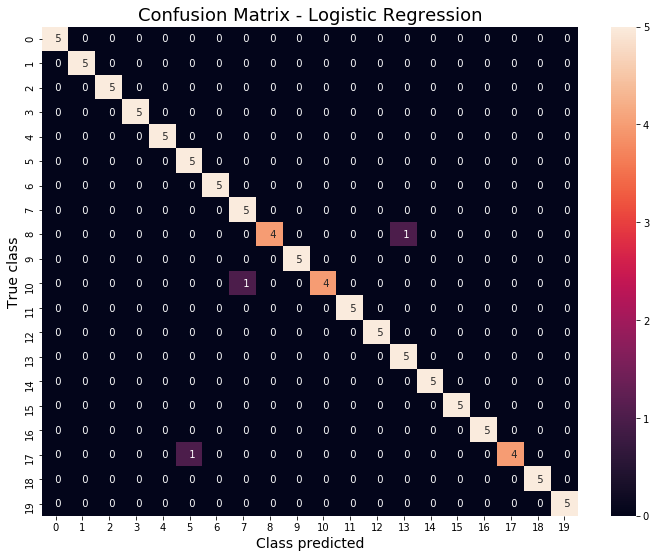

In [165]:
plt.figure(figsize=(12,9))
sns.heatmap(confusion_matrix(y_val.argmax(axis=1),y_pred_val.argmax(axis=1)), annot=True, fmt="3d")
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.xlabel('Class predicted', fontsize=14)
plt.ylabel('True class', fontsize=14)
plt.show()

In [168]:
print(classification_report(y_val.argmax(axis=1),y_pred_val.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      0.80      0.89         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       0.83      1.00      0.91         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    